# Imports:

In [136]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from xml.etree import ElementTree
from scipy import stats

import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000 # assists with processor speed

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

# import helper files from local environment
from env import user, password, host
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare
import QMCBT_03_explore as explore
import QMCBT_04_model as model
import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# allows import reload without needing to clear kernel and rerun
from importlib import reload
# reload(packagename) 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# Acquire & Prepare:

In [7]:
# Read in csv from local file as leam_df (Life Expectancy And Mortality DataFrame)
leam_df = pd.read_csv('clean_leam.csv', index_col=0)

In [8]:
# Check DataFrame
leam_df.T

,0,1,2,3,4,5,6,7,8,9,...,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207
YEAR,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
COUNTRY,AFG,AFG,AFG,AGO,AGO,AGO,ALB,ALB,ALB,ARE,...,YEM,ZAF,ZAF,ZAF,ZMB,ZMB,ZMB,ZWE,ZWE,ZWE
WHOSIS_000001,54.98949,55.41726,54.57449,49.30265,52.12018,46.77004,73.54528,76.91914,70.65347,73.18027,...,64.41312,65.25417,68.28989,62.20109,62.4529,65.36993,59.53606,60.68252,63.60674,57.51101
WHOSIS_000002,46.76397,46.58344,46.93113,42.87378,44.74432,41.18177,65.23516,67.68733,63.14932,63.85107,...,56.90595,56.15329,57.69447,54.58585,54.40409,56.31194,52.49771,53.06544,54.80482,51.20607
WHOSIS_000007,10.16798,10.11293,10.22541,10.73909,11.80188,9.66284,14.98377,16.71034,13.50208,13.58815,...,12.77636,13.8575,14.772,12.69391,12.58347,13.6557,11.27271,11.48429,12.43903,10.18165
WHOSIS_000015,13.92182,14.20647,13.63259,14.41537,16.00562,12.82086,18.9965,21.2058,17.10085,18.68954,...,16.77037,19.12211,20.52139,17.34433,16.53152,18.04779,14.6803,15.55015,16.98877,13.58761
life_expectancy,31.460815,31.580025,31.340905,29.332722,31.168,27.608877,43.190177,45.630652,41.10143,42.327258,...,37.71645,38.596767,40.319437,36.706295,36.492995,38.34634,34.496695,35.1956,36.95984,33.121585
SEX_BTSX,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
SEX_FMLE,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
SEX_MLE,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


<div class="alert alert-warning">

# Split

In [13]:
def split(df, stratify=False, target=None):
    """
    This Function splits the DataFrame into train, validate, and test
    then prints a graphic representation and a mini report showing the shape of the original DataFrame
    compared to the shape of the train, validate, and test DataFrames.
    
    IMPORTS Required:
    from sklearn.model_selection import train_test_split
    
    ARGUMENTS:
          df - Input the DataFrame you will split
    stratify - True will stratify for your Target (Do NOT stratify on continuous data)
               False will ignore this function
      target - Only needed if you will stratify
    """
    
    # Do NOT stratify on continuous data
    if stratify:
        # Split df into train and test using sklearn
        train, test = train_test_split(df, test_size=.2, random_state=1992, stratify=df[target])
        # Split train_df into train and validate using sklearn
        train, validate = train_test_split(train, test_size=.25, random_state=1992, stratify=df[target])
        
    else:
        train, test = train_test_split(df, test_size=.2, random_state=1992)
        train, validate = train_test_split(train, test_size=.25, random_state=1992)
    
    # reset index for train validate and test
    train.reset_index(drop=True, inplace=True)
    validate.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    train_prcnt = round((train.shape[0] / df.shape[0]), 2)*100
    validate_prcnt = round((validate.shape[0] / df.shape[0]), 2)*100
    test_prcnt = round((test.shape[0] / df.shape[0]), 2)*100
    
    print('________________________________________________________________')
    print('|                              DF                              |')
    print('|--------------------:--------------------:--------------------|')
    print('|        Train       |      Validate      |        Test        |')
    print(':--------------------------------------------------------------:')
    print()
    print()
    print(f'Prepared df: {df.shape}')
    print()
    print(f'      Train: {train.shape} - {train_prcnt}%')
    print(f'   Validate: {validate.shape} - {validate_prcnt}%')
    print(f'       Test: {test.shape} - {test_prcnt}%')
 
    
    return train, validate, test

In [15]:
train, validate, test = split(leam_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2208, 10)

      Train: (1324, 10) - 60.0%
   Validate: (442, 10) - 20.0%
       Test: (442, 10) - 20.0%


<div class="alert alert-success">

# Explore

<div class="alert alert-warning">

# Visualization

Text(0.5, 1.0, 'Features Correlating with life_expectancy')

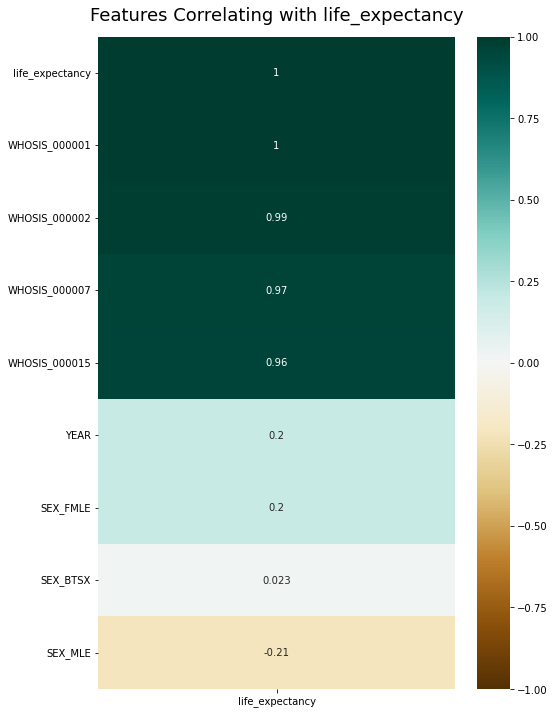

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['life_expectancy']].sort_values(by='life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with life_expectancy', fontdict={'fontsize':18}, pad=16)

In [121]:
# create the correlation matrix using pandas .corr()
target_corr = train.corr(method='pearson')
target_corr

,YEAR,WHOSIS_000001,WHOSIS_000002,WHOSIS_000007,WHOSIS_000015,life_expectancy,SEX_BTSX,SEX_FMLE,SEX_MLE
YEAR,1.000000,0.232300,0.228152,0.191569,0.202823,0.226604,0.050524,-0.046271,-0.005443
WHOSIS_000001,0.232300,1.000000,0.993449,0.913414,0.907476,0.994973,0.021889,0.190293,-0.207648
WHOSIS_000002,0.228152,0.993449,1.000000,0.895906,0.877042,0.987970,0.020170,0.119249,-0.136588
WHOSIS_000007,0.191569,0.913414,0.895906,1.000000,0.990259,0.948483,0.027721,0.236548,-0.258633
WHOSIS_000015,0.202823,0.907476,0.877042,0.990259,1.000000,0.939830,0.030424,0.287276,-0.310851
life_expectancy,0.226604,0.994973,0.987970,0.948483,0.939830,1.000000,0.023724,0.189599,-0.208809
SEX_BTSX,0.050524,0.021889,0.020170,0.027721,0.030424,0.023724,1.000000,-0.488837,-0.524465
SEX_FMLE,-0.046271,0.190293,0.119249,0.236548,0.287276,0.189599,-0.488837,1.000000,-0.486389
SEX_MLE,-0.005443,-0.207648,-0.136588,-0.258633,-0.310851,-0.208809,-0.524465,-0.486389,1.000000


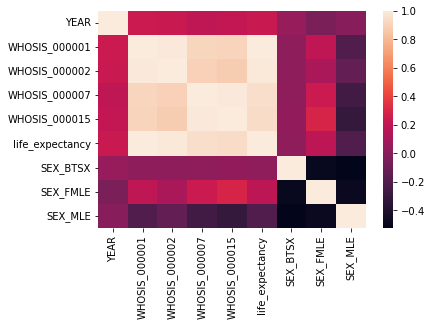

In [122]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(target_corr)
plt.show()

In [123]:
np.triu(target_corr)

array([[ 1.        ,  0.23230004,  0.22815215,  0.19156871,  0.2028233 ,
         0.22660449,  0.05052387, -0.04627051, -0.00544336],
       [ 0.        ,  1.        ,  0.9934489 ,  0.91341408,  0.90747575,
         0.99497252,  0.02188929,  0.19029293, -0.20764815],
       [ 0.        ,  0.        ,  1.        ,  0.89590623,  0.87704244,
         0.98797046,  0.02017015,  0.1192489 , -0.13658784],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.9902585 ,
         0.94848253,  0.02772087,  0.2365478 , -0.25863328],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.93982981,  0.03042366,  0.28727589, -0.31085057],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.02372434,  0.18959917, -0.20880897],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -0.48883736, -0.52446541],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

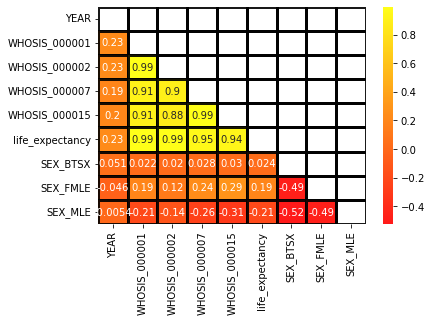

In [124]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(target_corr, cmap='autumn', annot=True, 
            mask=np.triu(target_corr), **kwargs)
plt.show()

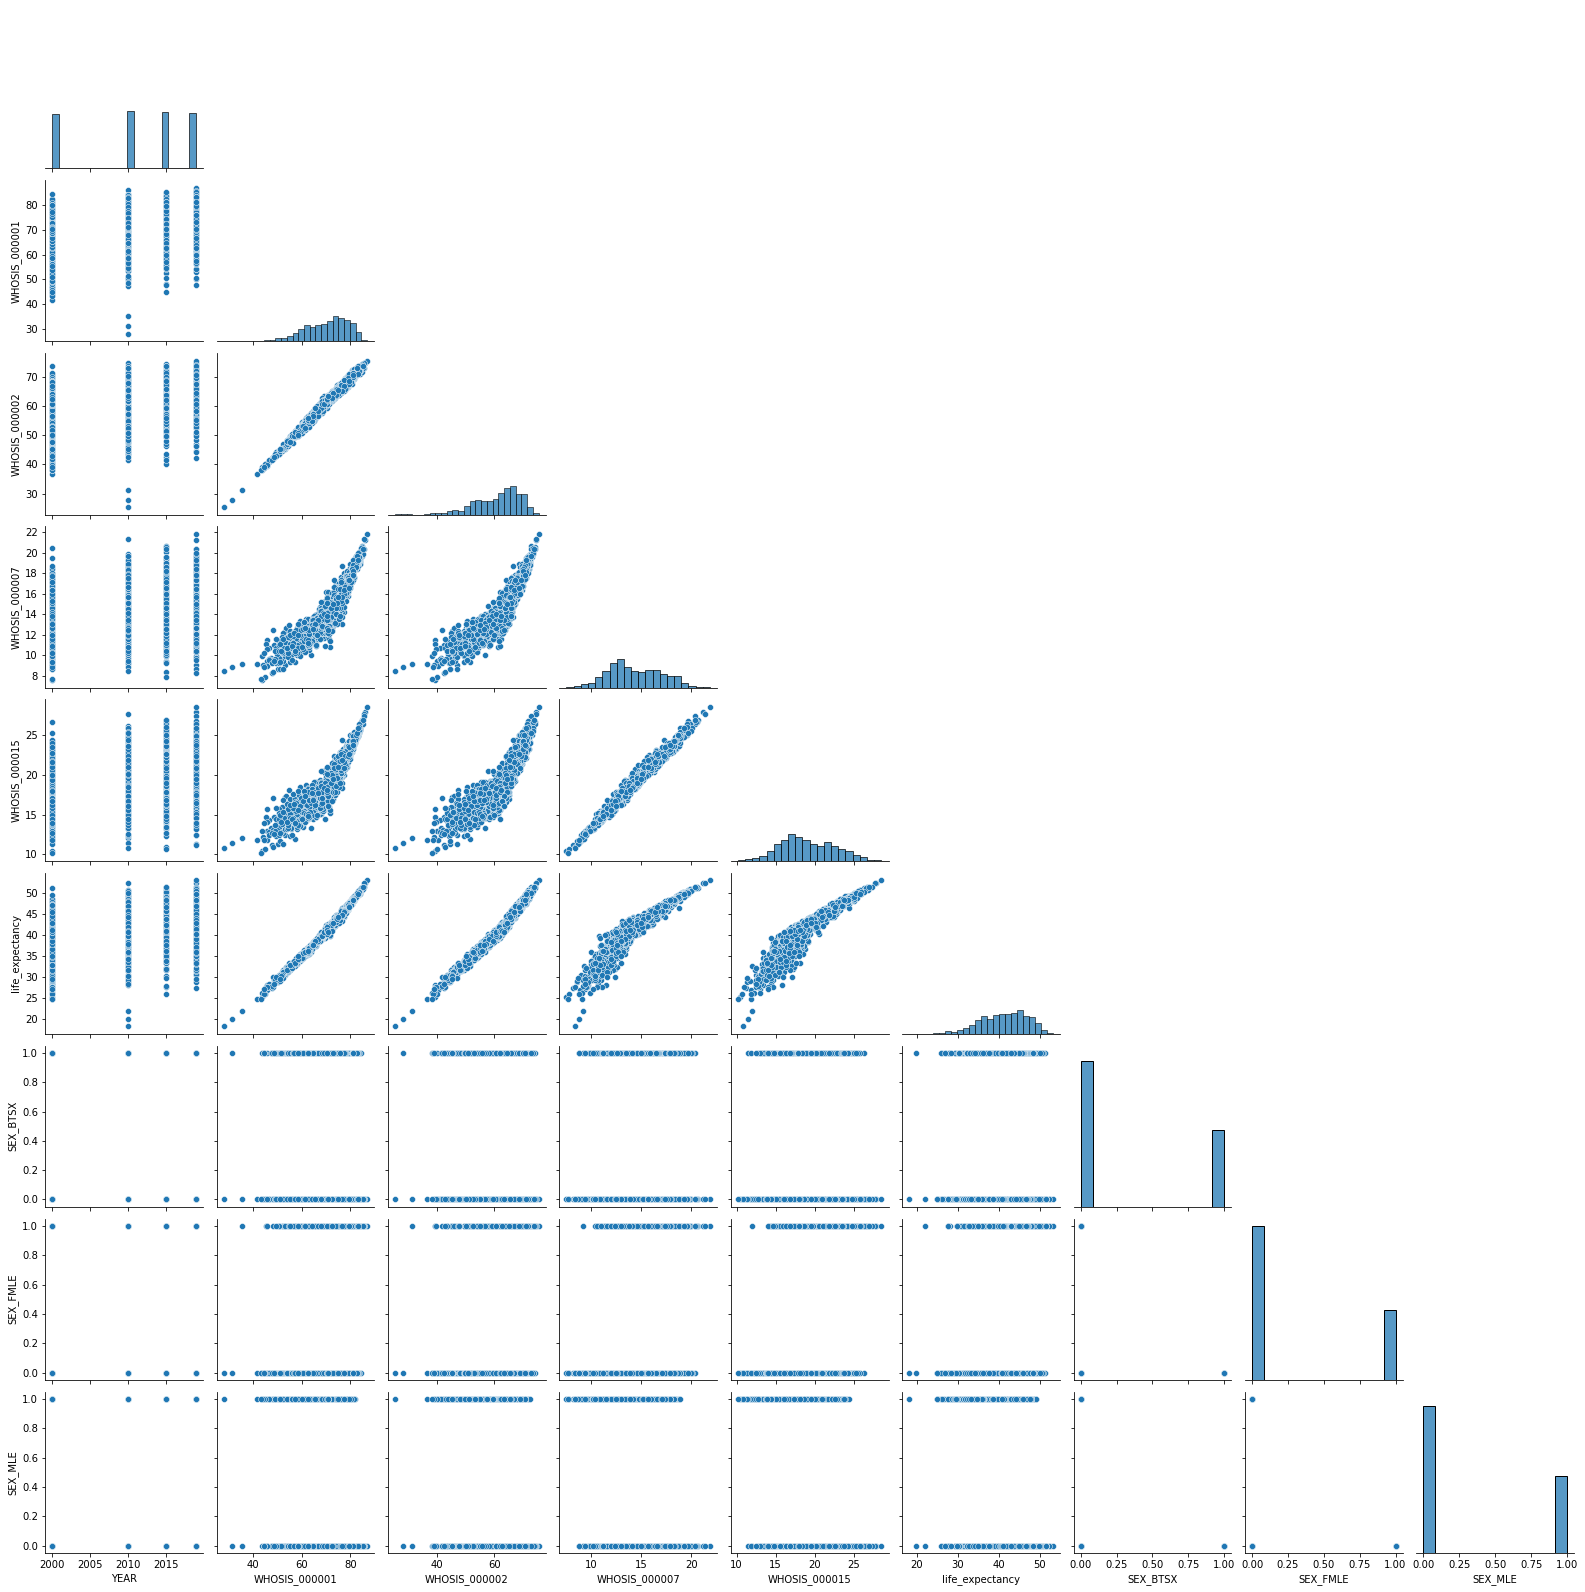

In [120]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train,
            corner=True)
plt.show()

<AxesSubplot:>

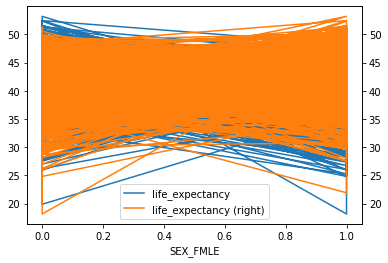

In [23]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'SEX_MLE', y = 'life_expectancy', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
train.plot(x = 'SEX_FMLE', y = 'life_expectancy', ax = ax, secondary_y = True) 

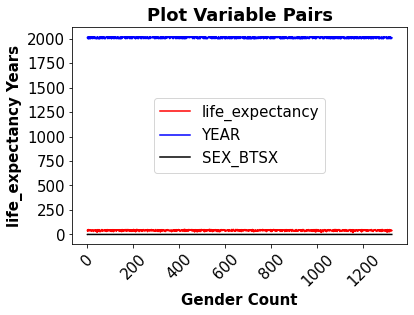

In [27]:
train['life_expectancy'].plot(kind='line', color='red', label='life_expectancy')
train['YEAR'].plot(kind='line', color='blue', label='YEAR')
train['SEX_BTSX'].plot(kind='line', color='black', label='SEX_BTSX')

plt.title('Plot Variable Pairs', fontsize=18, weight='bold')

plt.xlabel('Gender Count', fontsize=15, weight='bold')
plt.xticks(fontsize=15, rotation=45)

plt.ylabel('life_expectancy Years', fontsize=15, weight='bold')
plt.yticks(fontsize=15)

plt.legend(loc='center', fontsize=15)
plt.show()

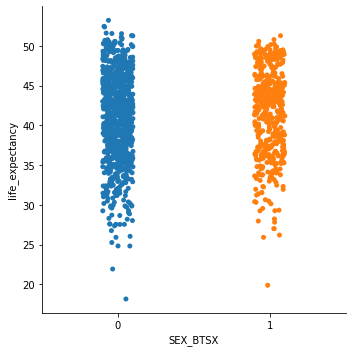

In [32]:
sns.catplot(data=train, y='life_expectancy', x='SEX_BTSX')

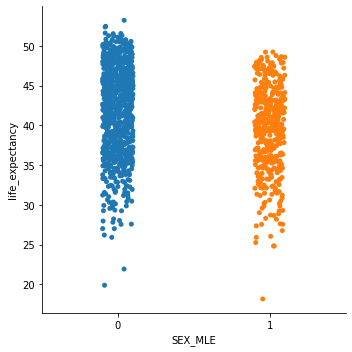

In [28]:
sns.catplot(data=train, y='life_expectancy', x='SEX_MLE')

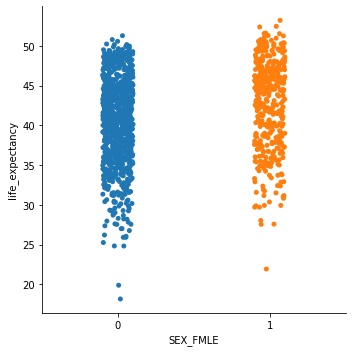

In [33]:
sns.catplot(data=train, y='life_expectancy', x='SEX_FMLE')

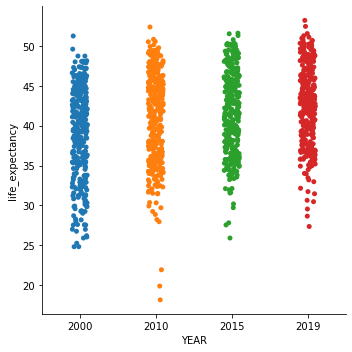

In [35]:
sns.catplot(data=train, y='life_expectancy', x='YEAR')

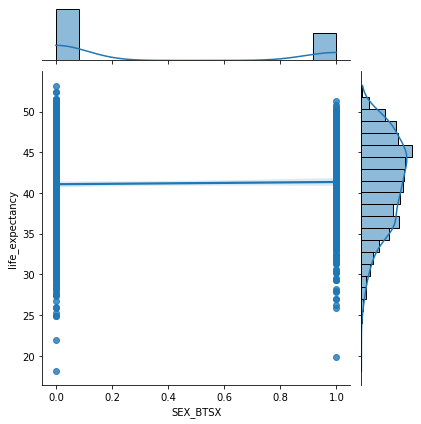

In [37]:
sns.jointplot(data=train, x=train.SEX_BTSX, y=train.life_expectancy, kind='reg')

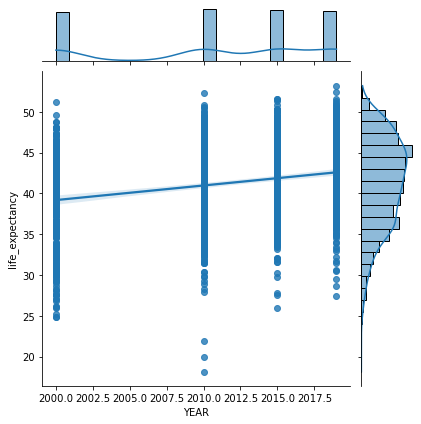

In [38]:
sns.jointplot(data=train, x=train.YEAR, y=train.life_expectancy, kind='reg')

In [40]:
def plot_variable_pairs(df, target):
    """
    Takes in a dataframe and target variable and plots each feature with the target variable
    """

    cols = df.columns.to_list()
    cols.remove(target) 
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
    
    return plt.show()

ValueError: could not convert string to float: 'GRD'

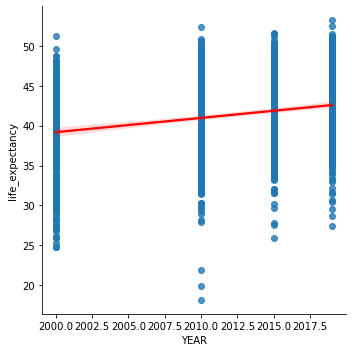

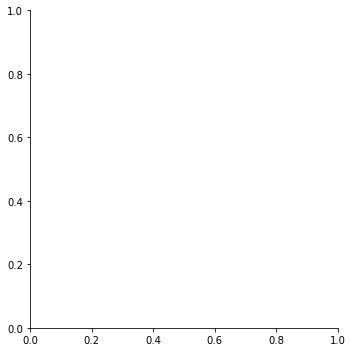

In [43]:
target = 'life_expectancy'
plot_variable_pairs(train, target)

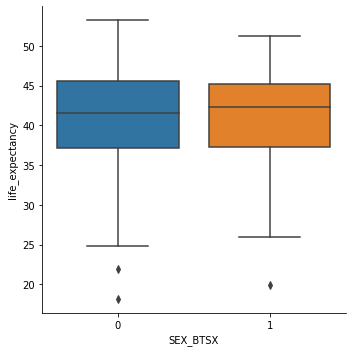

In [49]:
sns.catplot(data=train, x="SEX_BTSX", y="life_expectancy", kind="box")

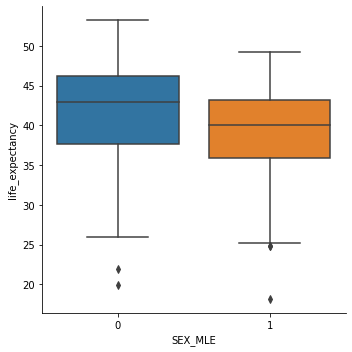

In [50]:
sns.catplot(data=train, x="SEX_MLE", y="life_expectancy", kind="box")

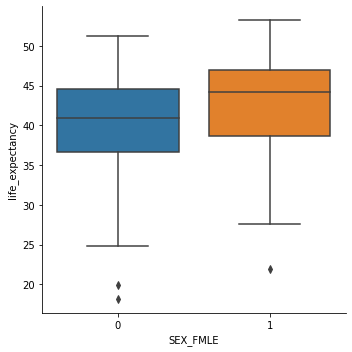

In [52]:
sns.catplot(data=train, x="SEX_FMLE", y="life_expectancy", kind="box")

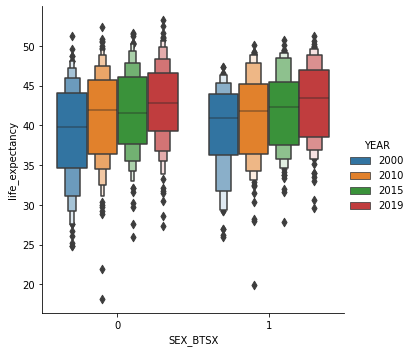

In [53]:
sns.catplot(data=train, x="SEX_BTSX", y="life_expectancy", hue="YEAR", kind="boxen")

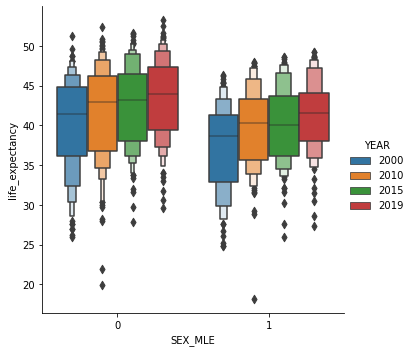

In [54]:
sns.catplot(data=train, x="SEX_MLE", y="life_expectancy", hue="YEAR", kind="boxen")

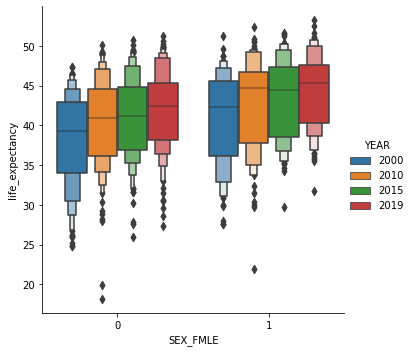

In [55]:
sns.catplot(data=train, x="SEX_FMLE", y="life_expectancy", hue="YEAR", kind="boxen")

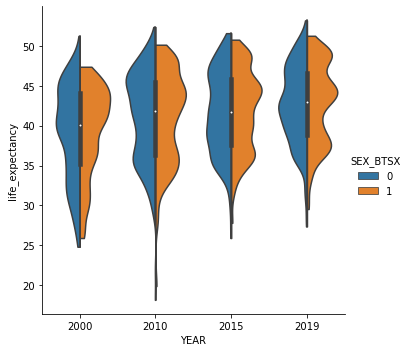

In [58]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_BTSX",
    kind="violin", bw=.25, cut=0, split=True)

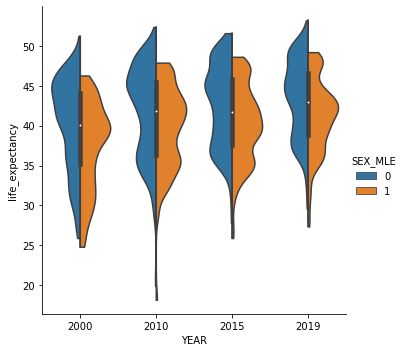

In [59]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_MLE",
    kind="violin", bw=.25, cut=0, split=True)

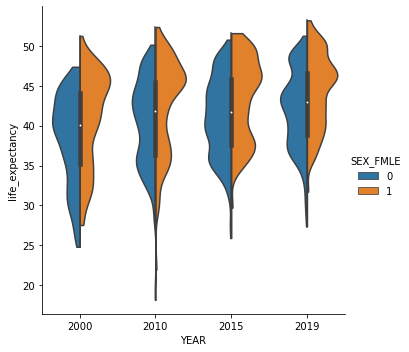

In [60]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_FMLE",
    kind="violin", bw=.25, cut=0, split=True)

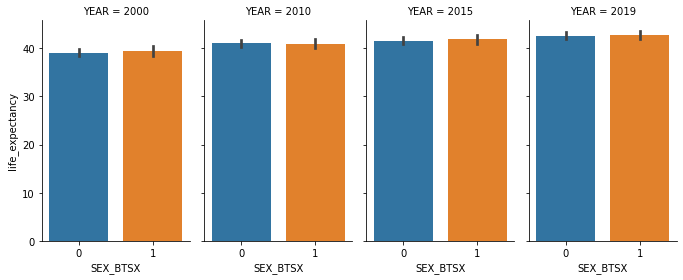

In [61]:
sns.catplot(
    data=train, x="SEX_BTSX", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

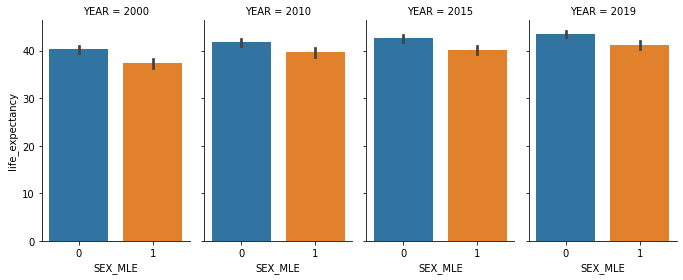

In [62]:
sns.catplot(
    data=train, x="SEX_MLE", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

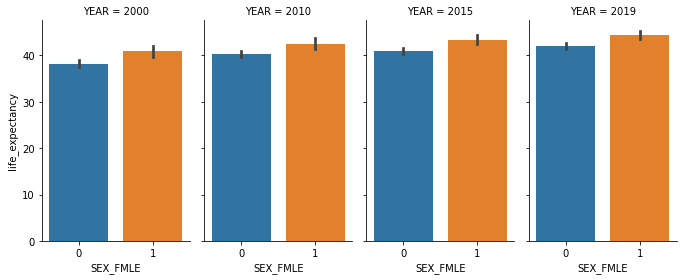

In [63]:
sns.catplot(
    data=train, x="SEX_FMLE", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

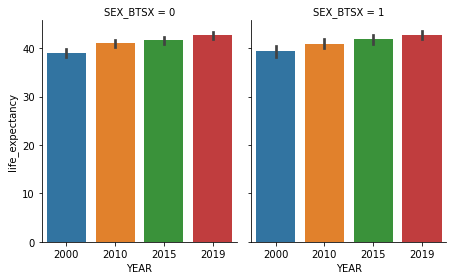

In [64]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_BTSX",
    kind="bar", height=4, aspect=.8,
)

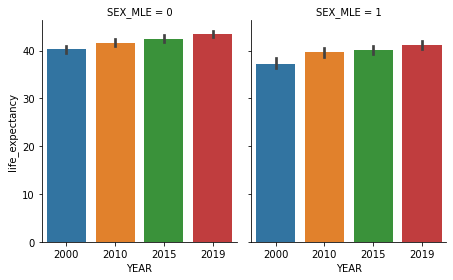

In [65]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_MLE",
    kind="bar", height=4, aspect=.8,
)

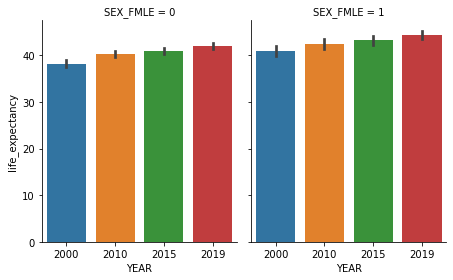

In [66]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_FMLE",
    kind="bar", height=4, aspect=.8,
)

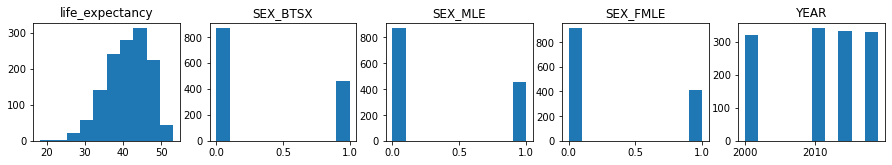

In [88]:
plt.figure(figsize=(50, 10))

# List of columns
cols = ['life_expectancy', 'SEX_BTSX', 'SEX_MLE', 'SEX_FMLE', 'YEAR']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

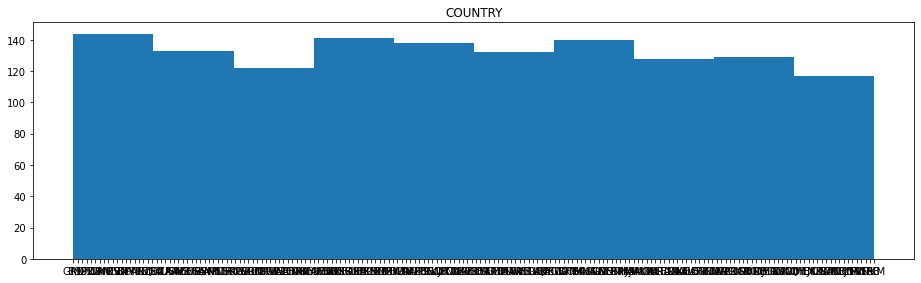

In [91]:
plt.figure(figsize=(300, 20))

# List of columns
cols = ['COUNTRY']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

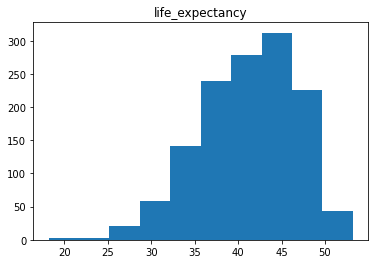

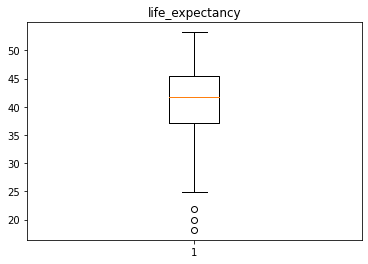

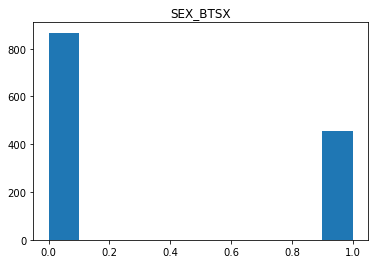

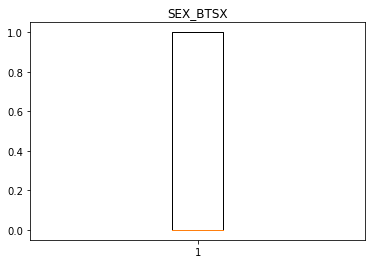

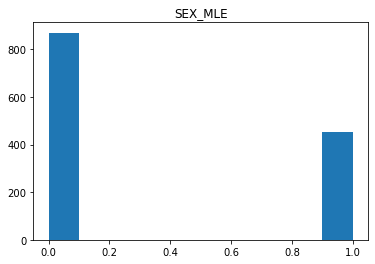

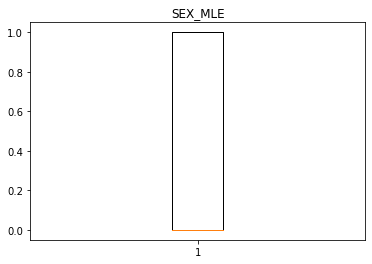

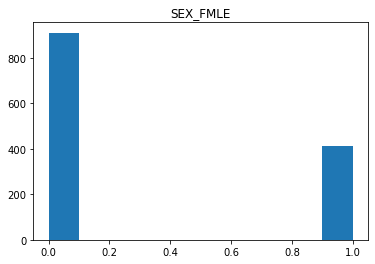

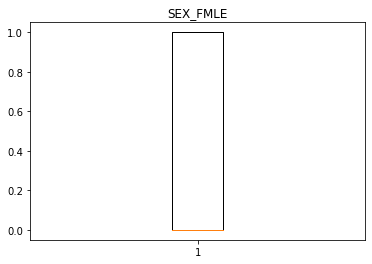

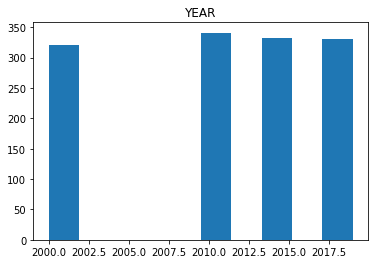

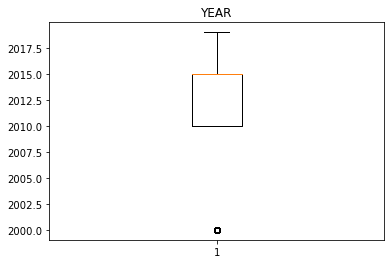

In [94]:
# List of columns
cols = ['life_expectancy', 'SEX_BTSX', 'SEX_MLE', 'SEX_FMLE', 'YEAR']

# Plot numeric columns
for col in cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

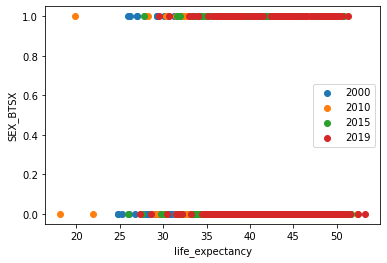

In [103]:
categorical_target = 'YEAR'
combos = [('life_expectancy','SEX_BTSX','SEX_MLE','SEX_FMLE','YEAR')]

x = combos[0][0]
y = combos[0][1]

def scatter_chart(x, y):
    for life_expectancy, subset in train.groupby(categorical_target):
        plt.scatter(subset[x], subset[y], label = life_expectancy)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        
scatter_chart(x, y)

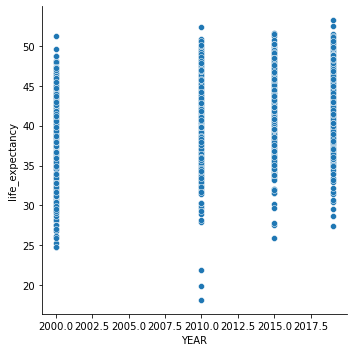

In [104]:
sns.relplot(data=train, x='YEAR', y='life_expectancy')
plt.show()

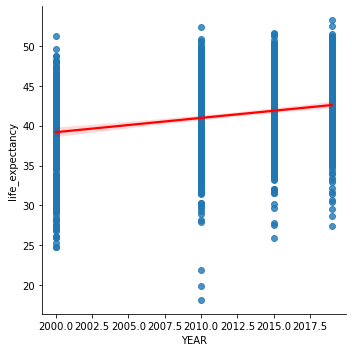

In [106]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='YEAR', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

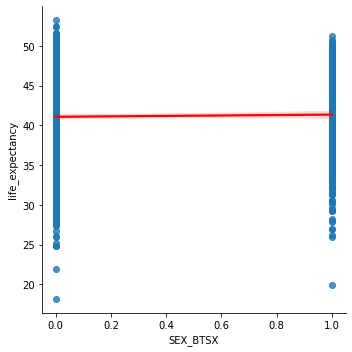

In [110]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_BTSX', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

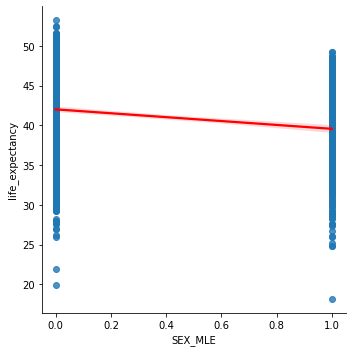

In [108]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_MLE', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

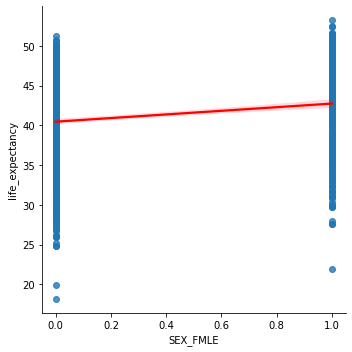

In [109]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_FMLE', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

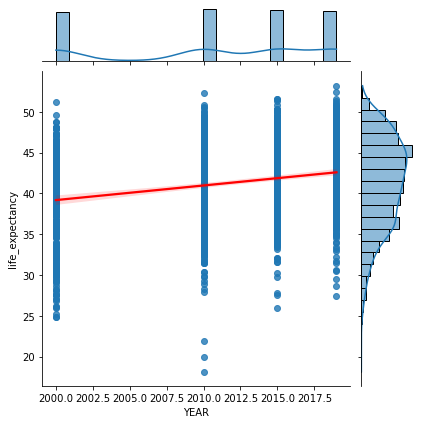

In [114]:
sns.jointplot(data=train, x='YEAR', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

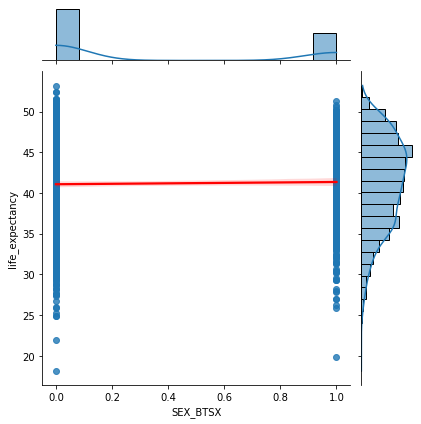

In [115]:
sns.jointplot(data=train, x='SEX_BTSX', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

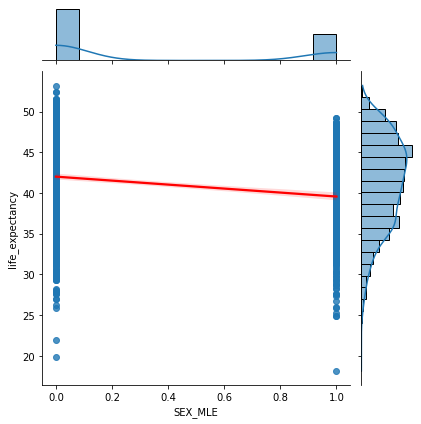

In [116]:
sns.jointplot(data=train, x='SEX_MLE', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

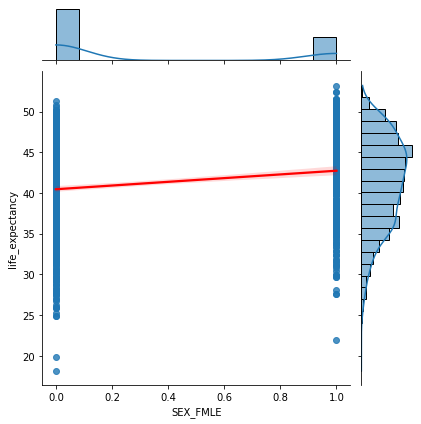

In [117]:
sns.jointplot(data=train, x='SEX_FMLE', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

SEX_FMLE
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SEX_MLE, dtype: object

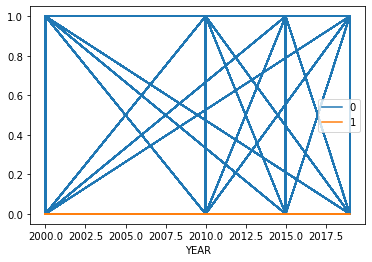

In [211]:
# 
df = train.copy()

#define index column
df.set_index('YEAR', inplace=True)

#group data by product and display sales as line chart
df.groupby('SEX_FMLE')['SEX_MLE'].plot(legend=True)


<AxesSubplot:xlabel='YEAR'>

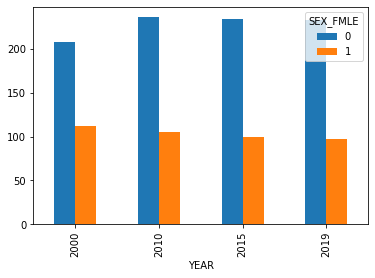

In [204]:
pd.crosstab(train['YEAR'],train['SEX_FMLE']).plot.bar()

<AxesSubplot:xlabel='SEX_FMLE'>

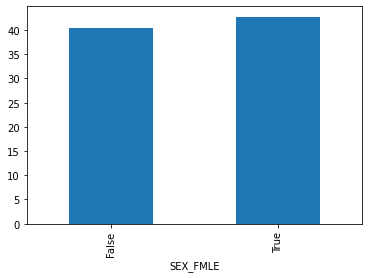

In [191]:
groups = train.groupby(is_female).life_expectancy.mean()
groups.plot.bar()

# ANALYSIS
<div class="alert alert-warning">
* TARGET = CHURN

## What do I want to ask?
    
### 1.1 Is there a relationship between BTSX and life_expectancy?
* There **is** a significant ```relationship``` between Gender and Life Expectancy.

### 1.2 Is the average life_expectancy of Females greater than the average life_expectancy of Males?
* The average life_expectancy of Females ```is greater than``` the average life_expectancy of Males.
    
### 2.1 Is there a relationship between Year and life_expectancy?  
* ```Monthly Charges``` has a significant ```Relationship``` with ```Churn```.  
    
### 2.2 Is the average life_expectancy in 2019 greater than the average life_expectancy in 2000?
* The ```average monthly charges``` of customers that ```Churn``` are ```less than or equal``` to the ```average monthly charges``` of ```Active``` customers.

### 3. Is there a relationship between COUNTRY and life_expectancy?**  
* ```Tech Support``` has **NO** significant ```Relationship``` with ```Churn```**
    
### 4. Is there a relationship between BTSX and COUNTRY?**   
* answer

</div>

<div class="alert alert-danger">



# Include at least 4 visualizations in the form of:
* Question in markdown that you want to answer
* Visualization
* Statistical test (in at least 2 of your 4)
* Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

<div class="alert alert-warning">


# Q_1.1
## Is there a relationship between Gender and life_expectancy?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (BTSX, life_expectancy)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (BTSX, life_expectancy)**  
  
  
 * Continuous or Discreat?  
  **Discreate (BTSX) vs Continuous (life_expectancy) = T-Test**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: There is **NOT** a significant ```relationship``` between Gender and Life Expectancy**.   
      * ```BTSX``` != ```life_expectancy```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: There **is** a significant ```relationship``` between Gender and Life Expectancy**.  
      * ```BTSX``` == ```life_expectancy```

## Visualization

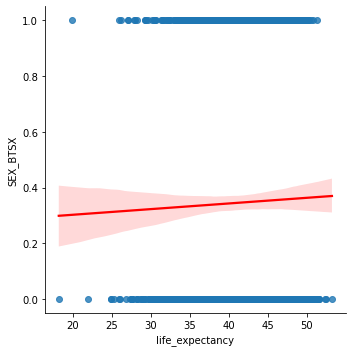

In [131]:
sns.lmplot(y='SEX_BTSX', x='life_expectancy', data=train, line_kws={'color': 'red'})
plt.show()

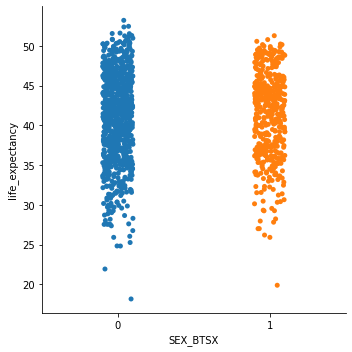

In [134]:
sns.catplot(data=train, y='life_expectancy', x='SEX_BTSX')

## Test Hypothesis

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [141]:
t_stat, p_val = stats.levene(train.SEX_BTSX, train.life_expectancy)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_BTSX, 
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_BTSX, 
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: -265.90025826286285
p-value: 0.0


In [142]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
There **is** a significant ```relationship``` between Gender and Life Expectancy

<div class="alert alert-warning">


# Q_1.2 
## Is the average life_expectancy of Females is greater than the average life_expectancy of Males?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **one_tail 
  
  
 * One Sample or Two Samples?  
  **two_sample 
  
  
 * Continuous or Discreat?  
  **Continuous (Female Life Expectancy) vs Continuous (Male Life Expectancy) = Pearson-R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The average life_expectancy of Females ```is less than``` the average life_expectancy of Males**. 
      * ```groupby(is_female).life_expectancy.mean``` <= ```groupby(is_male).life_expectancy.mean```
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The average life_expectancy of Females ```is greater than``` the average life_expectancy of Males**. 
      * ```groupby(is_female).life_expectancy.mean``` > ```groupby(is_male).life_expectancy.mean```

In [143]:
is_male = train.SEX_MLE == 1
is_female = train.SEX_FMLE == 1

## Visualization

<div class="alert alert-danger">
    
# FIND VISUALIZATION

In [225]:
#sns.catplot(data=train, y='life_expectancy', x='SEX_BTSX')

<div class="alert alert-danger">
    
# FIND VISUALIZATION

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [149]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

print(train.groupby(is_female).life_expectancy.count()) 
print('___________________________________________________')
print(train.groupby(is_male).life_expectancy.count())
print('___________________________________________________')
print(f'Total Count: {train.life_expectancy.count()}')

SEX_FMLE
False    911
True     413
Name: life_expectancy, dtype: int64
___________________________________________________
SEX_MLE
False    870
True     454
Name: life_expectancy, dtype: int64
___________________________________________________
Total Count: 1324


## Test Hypothesis

In [226]:
r, p_val = stats.pearsonr(train.groupby(is_female).life_expectancy.mean(),
                          train.groupby(is_male).life_expectancy.mean()
                         )
r, p_val

(-1.0, 1.0)

In [227]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


<div class="alert alert-info">
    
    
The average life_expectancy of Females is **NOT** ```greater than``` the average life_expectancy of Males

<div class="alert alert-warning">


# Q_2.1
## Is there a relationship between ```Year``` and ```life_expectancy```?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail  
  
  
 * One Sample or Two Samples?  
  **two_sample  
  
  
 * Continuous or Discreat?  
  **Discreate (YEAR) vs Continuous (life_expectancy) = T-Test**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: There is **NOT** a significant ```relationship``` between the Year and Life Expectancy**.   
      * ```YEAR``` != ```life_expectancy```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: There **is** a significant ```relationship``` between the Year and Life Expectancy**.  
      * ```YEAR``` == ```life_expectancy```

## Visualization

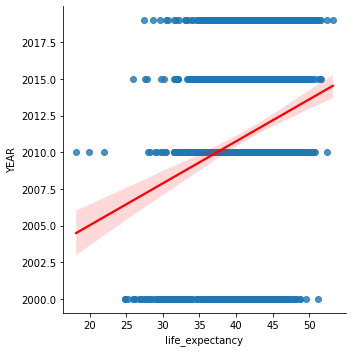

In [212]:
sns.lmplot(y='YEAR', x='life_expectancy', data=train, line_kws={'color': 'red'})
plt.show()

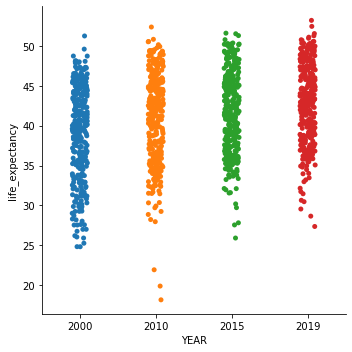

In [213]:
sns.catplot(data=train, y='life_expectancy', x='YEAR')

## Test Hypothesis

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [214]:
t_stat, p_val = stats.levene(train.YEAR, train.life_expectancy)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.YEAR, 
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.YEAR, 
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: 7989.336446207112
p-value: 0.0


In [215]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
There **is** a significant ```relationship``` between the Year and Life Expectancy.

<div class="alert alert-warning">


# Q_2.2 
## Is the average life_expectancy in 2019 greater than the average life_expectancy in 2000?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **one_tail 
  
  
 * One Sample or Two Samples?  
  **two_sample 
  
  
 * Continuous or Discreat?  
  **Continuous (2019 Life Expectancy) vs Continuous (2000 Life Expectancy) = Pearson-R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The average life_expectancy in 2019 ```is less than``` the average life_expectancy 2000**. 
      * ```groupby(year_2019).life_expectancy.mean``` <= ```groupby(year_2000).life_expectancy.mean```
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The average life_expectancy in 2019 ```is greater than``` the average life_expectancy in 2000**. 
      * ```groupby(year_2019).life_expectancy.mean``` > ```groupby(year_2000).life_expectancy.mean```

In [216]:
year_2019 = train.YEAR == 2019
year_2000 = train.YEAR == 2000

## Visualization

<div class="alert alert-danger">
    
# FIND VISUALIZATION

In [221]:
#plt.plot(data=train, y=year_2019, x=year_2000)

<div class="alert alert-danger">
    
# FIND VISUALIZATION

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [222]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

print(train.groupby(year_2019).life_expectancy.count()) 
print('___________________________________________________')
print(train.groupby(year_2000).life_expectancy.count())
print('___________________________________________________')
print(f'Total Count: {train.life_expectancy.count()}')

YEAR
False    994
True     330
Name: life_expectancy, dtype: int64
___________________________________________________
YEAR
False    1004
True      320
Name: life_expectancy, dtype: int64
___________________________________________________
Total Count: 1324


## Test Hypothesis

In [231]:
train.groupby(year_2019).life_expectancy.mean()

YEAR
False    40.662498
True     42.700843
Name: life_expectancy, dtype: float64

In [232]:
train.groupby(year_2000).life_expectancy.mean()

YEAR
False    41.800093
True     39.195337
Name: life_expectancy, dtype: float64

In [223]:
r, p_val = stats.pearsonr(train.groupby(year_2019).life_expectancy.mean(),
                          train.groupby(year_2000).life_expectancy.mean()
                         )
r, p_val

(-1.0, 1.0)

In [224]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


<div class="alert alert-info">
    
    
The average life_expectancy in 2019 is **NOT** ```greater than``` the average life_expectancy in 2000